In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [2]:
baseball = pd.read_csv('C:/Users/abern/OneDrive/CIND820/baseball.csv')
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [4]:
#Check for Categorical variables

baseball.describe(include = 'O')

,Team,League
count,1232,1232
unique,39,2
top,STL,NL
freq,47,616


In [5]:
#Convert 'Team' variable to a numeric variable

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en = baseball.iloc[:,0].values

In [6]:
X_en =labelencoder.fit_transform(X_en)
X_en

array([ 1,  2,  3, ..., 31, 32, 37])

In [7]:
X = baseball
X['Team'] = X_en
y = baseball.iloc[:,0].values

In [8]:
baseball_1 = X.copy()
baseball_1['Team'] = y
baseball_1

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [9]:
#Convert 'League' variable into a numeric variable

X_e = baseball_1.iloc[:,1].values

In [10]:
X_e = labelencoder.fit_transform(X_e)
X_e

array([1, 1, 0, ..., 1, 1, 0])

In [11]:
Y = baseball_1
Y['League'] = X_e

In [12]:
baseball_2 = Y.copy()
baseball_2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [13]:
baseball_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   int32  
 1   League        1232 non-null   int32  
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int32(2), int64(6)
memory usage: 134.9 KB


In [14]:
#Replace NA's in 'RankSeason' and 'RankPlayoffs' with 0.

baseball_2[['RankSeason', 'RankPlayoffs']] = baseball_2[['RankSeason', 'RankPlayoffs']].fillna(0)
baseball_2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,NaN,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,NaN,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,NaN,NaN


In [17]:
#Predict for NAs in 'OOBP'

data_without_null = baseball_2.dropna()
data_without_null

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,0.356,0.434,0.271,0,0.0,0.0,162,0.345,0.423
416,32,1,1999,809,838,75,0.338,0.426,0.262,0,0.0,0.0,161,0.355,0.427
417,33,0,1999,772,913,69,0.343,0.411,0.274,0,0.0,0.0,162,0.371,0.448
418,35,0,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [19]:
train_data_x = data_without_null.iloc[:,:13]
train_data_y = data_without_null.iloc[:,13]

In [20]:
train_data_x

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,0.356,0.434,0.271,0,0.0,0.0,162
416,32,1,1999,809,838,75,0.338,0.426,0.262,0,0.0,0.0,161
417,33,0,1999,772,913,69,0.343,0.411,0.274,0,0.0,0.0,162
418,35,0,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162


In [21]:
train_data_y

0      0.317
1      0.306
2      0.315
3      0.331
4      0.335
       ...  
415    0.345
416    0.355
417    0.371
418    0.346
419    0.353
Name: OOBP, Length: 420, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data_x, train_data_y)

LinearRegression()

In [23]:
test_data = baseball_2.iloc[:,:13]
test_data['OOBP'] = pd.DataFrame(lr.predict(test_data))
baseball_2.OOBP.fillna(test_data.OOBP, inplace = True)
baseball_2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317000,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306000,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315000,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331000,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335000,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.340993,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.320679,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.324978,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.327632,NaN


In [24]:
#Round 'OOBP' to 3 decimal places

baseball_2['OOBP'] = baseball_2['OOBP'].round(decimals = 3)
baseball_2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.341,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.321,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.325,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.328,NaN


In [25]:
#Predict NA's for 'OSLG'

data2_without_null = baseball_2.dropna()
data2_without_null

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,0.356,0.434,0.271,0,0.0,0.0,162,0.345,0.423
416,32,1,1999,809,838,75,0.338,0.426,0.262,0,0.0,0.0,161,0.355,0.427
417,33,0,1999,772,913,69,0.343,0.411,0.274,0,0.0,0.0,162,0.371,0.448
418,35,0,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [26]:
train2_data_x = data2_without_null.iloc[:,:14]
train2_data_y = data2_without_null.iloc[:,14]

In [27]:
train2_data_x

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,31,1,1999,872,831,86,0.356,0.434,0.271,0,0.0,0.0,162,0.345
416,32,1,1999,809,838,75,0.338,0.426,0.262,0,0.0,0.0,161,0.355
417,33,0,1999,772,913,69,0.343,0.411,0.274,0,0.0,0.0,162,0.371
418,35,0,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346


In [28]:
train2_data_y

0      0.415
1      0.378
2      0.403
3      0.428
4      0.424
       ...  
415    0.423
416    0.427
417    0.448
418    0.459
419    0.456
Name: OSLG, Length: 420, dtype: float64

In [29]:
lr.fit(train2_data_x, train2_data_y)

LinearRegression()

In [30]:
test2_data = baseball_2.iloc[:,:14]
test2_data['OSLG'] = pd.DataFrame(lr.predict(test2_data))
baseball_2.OSLG.fillna(test2_data.OSLG, inplace = True)
baseball_2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415000
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378000
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403000
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428000
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.341,0.417606
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.321,0.381686
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.325,0.412255
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.328,0.397784


In [31]:
#Round 'OSLG' to 3 decimals

baseball_2['OSLG'] = baseball_2['OSLG'].round(decimals = 3)
baseball_2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.341,0.418
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.321,0.382
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.325,0.412
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.328,0.398


In [33]:
#Rank the variables by importance with ANOVA

importances = baseball_2.drop('Playoffs', axis = 1).apply(lambda x: x.corr(baseball_2.Playoffs))
indices = np.argsort(importances)
print(importances[indices])

OOBP           -3.304752e-01
RA             -2.614768e-01
OSLG           -2.227374e-01
Team           -3.757032e-03
League         -2.261189e-19
G               2.220776e-02
Year            1.457787e-01
BA              2.902170e-01
SLG             3.247127e-01
OBP             3.638902e-01
RS              3.866285e-01
W               6.167573e-01
RankSeason      8.497857e-01
RankPlayoffs    9.122019e-01
dtype: float64


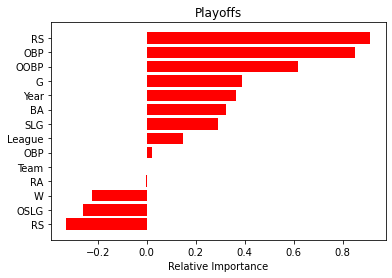

In [34]:
names = ['RA', 'Team', 'League', 'G', 'OSLG', 'OOBP', 'Year', 'BA', 'SLG', 'OBP', 'RS', 'OBP', 'RS', 'W', 'RankSeason', 'RankPlayoffs']
plt.title('Playoffs')
plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
#Set importance threshold to 0.4 and show the variables greater than 0.4

for i in range(0, len(indices)):
    if np.abs(importances[i]) > 0.4:
        print(names[i])

OOBP
OBP
RS
